In [ ]:
!pip install gmaps==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 KB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.9 MB/s eta 0:00:00
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=debae47e78c338179cc8a6019789b3be94a5665921a8ef7cb8a4c6d0f0559bf3
  Stored in directory: /root/.cache/pip/wheels/66/ab/29/3032938612273665f0fa4d2fab4e3ecfe86480eaaa40aaee91
Successfully built gmaps
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Start writing code here...
import pandas as pd
import sqlite3
import seaborn as sns
import numpy as np


con = sqlite3.connect('2022Cosmos13TestData.db')
cur = con.cursor()

In [ ]:
# joined_table
sql = '''
SELECT ph.level, lt.timestamp, lt.lat, lt.lon, lt.boat_id, temperature.degree, dissolved_solids.ppm
FROM location_time AS lt 
INNER JOIN ph
ON ph.locationtime_id = lt.id
INNER JOIN temperature
ON temperature.locationtime_id = lt.id
INNER JOIN dissolved_solids
ON dissolved_solids.locationtime_id = lt.id
'''
df_wtr = pd.read_sql(sql, con)
df_wtr.timestamp = pd.to_datetime(df_wtr.timestamp, format='%Y-%m-%d %H:%M:%S')
df_wtr.head()


,level,timestamp,lat,lon,boat_id,degree,ppm
0,405.81,2016-01-11 06:43:58,-58.680,-65.522,1,2.82,33.84
1,405.08,2016-01-11 06:47:40,-58.690,-65.517,1,2.78,33.83
2,404.47,2016-01-11 06:50:23,-58.698,-65.512,1,2.75,33.83
3,404.02,2016-01-11 06:53:07,-58.706,-65.508,1,2.72,33.82
4,403.64,2016-01-11 06:55:51,-58.711,-65.504,1,2.70,33.82


In [ ]:
corr = df_wtr[['level', 'degree', 'ppm']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,level,degree,ppm
level,1.00,0.40,0.16
degree,0.40,1.00,0.20
ppm,0.16,0.20,1.00


In [ ]:
df_wtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   level      10002 non-null  float64
 1   timestamp  10002 non-null  object 
 2   lat        10002 non-null  float64
 3   lon        10002 non-null  float64
 4   boat_id    10002 non-null  int64  
 5   degree     10002 non-null  float64
 6   ppm        10002 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 547.1+ KB


In [ ]:
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
g = sns.lineplot(x="timestamp", y="level", 
             data=df_wtr)
g.figure.autofmt_xdate()

NameError: name 'sns' is not defined

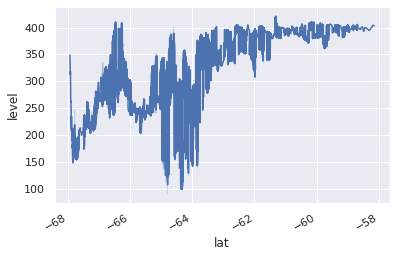

In [ ]:
g = sns.lineplot(x="lat", y="level", 
             data=df_wtr)
g.figure.autofmt_xdate()

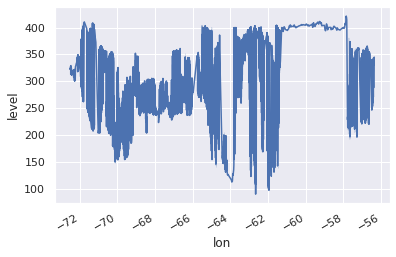

In [ ]:
g = sns.lineplot(x="lon", y="level", 
             data=df_wtr)
g.figure.autofmt_xdate()

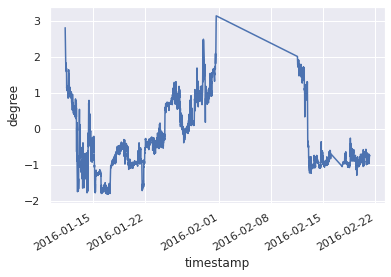

In [ ]:
g = sns.lineplot(x="timestamp", y="degree", 
             data=df_wtr)
g.figure.autofmt_xdate()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad7152cb-d6c4-47fc-bce4-a1bd5240d55e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>